### CMPE462 (Machine Learning) | Homework 3 | Cemal Burak Aygün (2014400072)

# Description
**Target:** Implement multi-layer perceptron and analyze the results

**Data:**  The dataset (points2d.dat) is attached to the email. The sample includes 400 instances. Each instance is represented by a feature vector of 2 dimensions. The third column corresponds to the class (0/1/2) of the instance.

- Report how you split the sample for training and test. Report how you designed your neural network to solve this 3-class problem.(number of layers, error function etc.)
- Derive weight update equations using hyperbolic tangent activation function for hidden layers and sigmoid activation function for output layer . Submit a hard-copy of this derivation, drawing the the corresponding neural network with hidden units. All the formulas and the corresponding symbols should be clear. 
- Implement multi-layer perceptron with 5 hidden units. While training at each iteration, plot the error on training and test sets.
- After training converges: Plot the validation/test set and show true positives, true negatives,false positives, and false negatives (with different markers, colors, etc.)

# Design of Neural Network

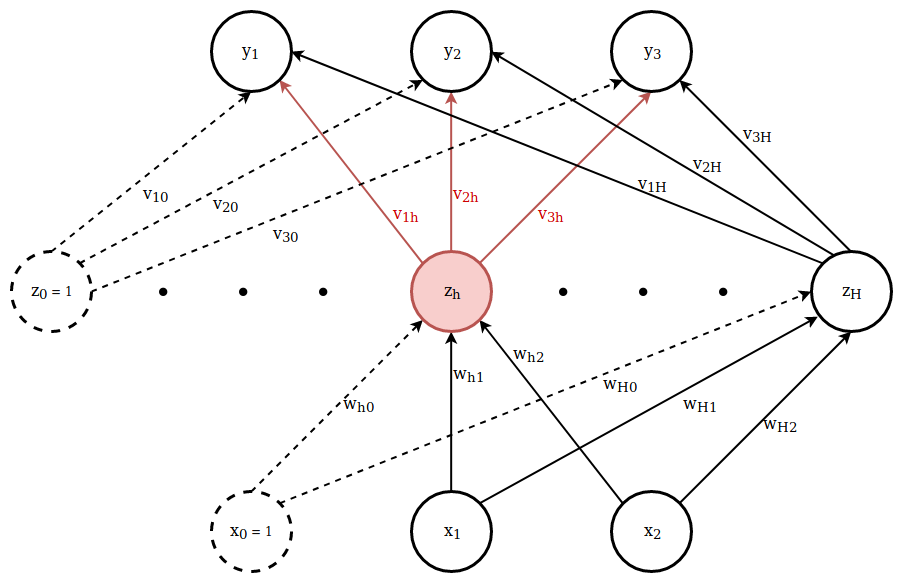

Dataset contains instances that have $2$ features and each of them belongs to one of the $3$ classes. The network should take an instance $\boldsymbol{x} = <x_1, x_2>$ and assign it to one the classes. For this purpose, I designed a neural network with **3** layers: One input layer with 2 nodes, one output layer with 3 nodes, and one hidden layer with configurable amount of nodes. Each input node corresponds to a feature of the instance. Each output node coreesponds to a class. When an instance is processed on the network, the output node with the highest value ($y_i$) is chosen as the class (class-(i-1)) of that instance.

Note that $x_0$ and $z_0$ shown in the figure above are not "actual" nodes of the network. They contain a fix value of $1$ and they do not have any incoming edges. The weights going out of those nodes represent the **bias** values of the nodes they point to. So, $w_{h0}$ is the bias of $z_h$ and $v_{i0}$ is the bias of $y_i$.

Error Function of the network is as follows:
\begin{align}
E(\boldsymbol{W}, \boldsymbol{V} | \boldsymbol{X}) = \frac{1}{2} \big( \frac{1}{T} \sum_{t=1}^{400} \sum_{i=1}^{3} (r_i^t - y_i^t) ^ 2 \big)
\end{align}
where $T$ is the total number of train instances and $r_i^t$ is the groundtruth value of the output node $y_i$ for a given train instance $x^t$.

# Meanings of the Symbols

$ T : \text{Number of train instances} $

$ H : \text{Number of hidden layer nodes} $

$ t : \text{Superscript to denote a specific input; } \boldsymbol{x}^t \\
\quad \text{or the outcome for a specific input, } \textit{e.g. } \boldsymbol{y}^t \text{ denotes the values of the output layer nodes when the input is } \boldsymbol{x}^t $

$ \eta : \text{Learning rate} $

$ \boldsymbol{x} : \text{Input layer nodes} $

$ \boldsymbol{y} : \text{Output layer nodes} $

$ \boldsymbol{z} : \text{Hidden layer nodes} $

$ \boldsymbol{r}^t : \text{Groundtruth values of output layer when the input is } \boldsymbol{x}^t $

$ i : \text{Subscript to denote a specific node of the output layer; } y_i \\
\quad \text{or the groundtruth value corresponding to } y_i \text{ ; } r_i $

$ j : \text{Subscript to denote a specific node of the input layer; } x_j $

$ h : \text{Subscript to denote a specific node of the hidden layer; } z_h $

$ w_{hj} : \text{Weight between input node } x_j \text{ and hidden node } z_h $

$ v_{ih} : \text{Weight between hidden node } z_h \text{ and output node } y_i $

$ \boldsymbol{W} : (Hx2) \text{ weight matrix which contains } w_{hj} \text{ values.}$

$ \boldsymbol{V} : (3xH) \text{ weight matrix } v_{ih} \text{ values.}$

$ \boldsymbol{X} : (400x2) \text{ train data matrix } $

# Derivations of the Weight Update Equations
$ \text{Sigmoid Function:} \qquad \sigma(x) = \frac{1}{1 + e^{-x}} \qquad \frac{d \sigma(x)}{dx} = \sigma(x) [1 - \sigma(x)] $

$ \text{Hyperbolic Tangent Function:} \qquad \tanh(x) = \frac{\sinh(x)}{\cosh(x)} = \frac{e^x - e^{-x}}{e^x + e^{-x}} \qquad \frac{d \tanh(x)}{dx} = 1 - \tanh^2(x) $

$ \text{Error Function:} \qquad E(\boldsymbol{W}, \boldsymbol{V} | \boldsymbol{X}) = \frac{1}{2} \big( \frac{1}{T} \sum_{t=1}^{400} \sum_{i=1}^{3} (r_i^t - y_i^t) ^ 2 \big) $

$
y_i^t = \sigma \big( \sum_{h=1}^{H}v_{ih} z_h^t + v_{i0} \big) \qquad
z_h^t = \tanh \big( \sum_{j=1}^{2} w_{hj} x_j^t + w_{h0} \big)
$

$
\Delta v_{ih} = {-\eta} \frac{\partial E}{\partial v_{ih}}
= {-\eta} \bigg< \frac{\partial E}{\partial y_i^t} \bigg> \bigg< \frac{\partial y_i^t}{\partial v_{ih}} \bigg> 
= {-\eta} \sum_{t=1}^{400} \big< \frac{1}{2} \frac{1}{T} 2 (r_i^t - y_i^t) (-1) \big> \big< y_i^t (1 - y_i^t) z_h^t \big> \\
\qquad = {\eta} \frac{1}{T} \sum_{t=1}^{400} (r_i^t - y_i^t) y_i^t (1 - y_i^t) z_h^t
$

$
\Delta w_{hj} = {-\eta} \frac{\partial E}{\partial w_{hj}}
= {-\eta} \bigg< \frac{\partial E}{\partial y_i^t} \bigg> \bigg< \frac{\partial y_i^t}{\partial z_h^t} \bigg> \bigg< \frac{\partial z_h^t}{\partial w_{hj}} \bigg> 
= {-\eta} \sum_{t=1}^{400} \big[ \sum_{i=1}^{3} \big< \frac{1}{2} \frac{1}{T} 2 (r_i^t - y_i^t) (-1) \big> \big< y_i^t (1 - y_i^t) v_{ih} \big> \big] \big< (1 - (z_h^t)^2) x_j^t \big> \\
\qquad = {\eta} \frac{1}{T} \sum_{t=1}^{400} \big[ \sum_{i=1}^{3} (r_i^t - y_i^t) y_i^t (1 - y_i^t) v_{ih} \big] (1 - (z_h^t)^2) x_j^t
$

# Code

## Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Some Parameters and Global Variables

In [2]:
DATA_FILE_PATH = './points2d.dat'
CLASSES = (0, 1, 2)  # Class labels of data points

FIGURE_SIZE = (16, 9)  # Size of the plots


TRAIN_DATA = []  # Contains (<train_instance:numpy.ndarray>, <label:int>) tuples
TEST_DATA = []  # Contains (<test_instance:numpy.ndarray>, <label:int>) tuples

## Functions

In [3]:
def sigmoid(x):
    """The sigmoid function."""
    return 1 / (1 + np.exp(-x))

In [4]:
def sigmoid_derivative(x):
    """Derivative of the sigmoid function."""
    sigmoid_x = sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)

In [5]:
def tanh_derivative(x):
    """Derivative of the hyperbolic tangent (tanh) function."""
    tanh_x = np.tanh(x)
    return 1 - np.power(tanh_x, 2)

## Neural Network Implementation

In [6]:
class Network3Layer(object):
    """
    Representation of a Neural Network with 3 layers.
    Hyperbolic Tangent activation function (tanh) is used for hidden layer.
    Sigmoid activation function is used for output layer.
    Weights (and biases) of the network are initialized randomly (uniformly in range [-0.01, 0.01]).
    """
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        """
        :param input_size: Number of nodes for input layer
        :param hidden_size: Number of nodes for hidden layer
        :param output_size: Number of nodes for output layer
        :param learning_rate: Learning rate of the network
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.learning_rate = learning_rate

        self.rand_uni_low = -0.01
        self.rand_uni_high = 0.01

        # Weight Matrix (weights between input layer & hidden layer)
        self.W = np.random.uniform(self.rand_uni_low, self.rand_uni_high, (hidden_size, input_size))

        # Weight Matrix (weights between hidden layer & output layer)
        self.V = np.random.uniform(self.rand_uni_low, self.rand_uni_high, (output_size, hidden_size))

        # First element contains the biases for the nodes of hidden layer.
        # Second element contains the biases for the nodes of output layer.
        self.biases = [np.random.uniform(self.rand_uni_low, self.rand_uni_high, (hidden_size, 1)),
                       np.random.uniform(self.rand_uni_low, self.rand_uni_high, (output_size, 1))]

    def instance_error(self, r, y):
        """
        Returns the error incurred by a single instance.
        :param r: The groundtruth values for the instance.
        :param y: The network output values for the instance.
        """
        return 0.5 * np.sum(np.power(r - y, 2))

    def feedforward(self, x):
        """
        Returns (<hidden_activations>, <output_activations>) Tuple of the network for given input (instance) `x`.
        """
        hidden_activations = np.tanh(np.dot(self.W, x.reshape(self.input_size, 1)) + self.biases[0])
        output_activations = sigmoid(np.dot(self.V, hidden_activations) + self.biases[1])

        return hidden_activations, output_activations

    def backpropagate(self, x, r):
        """
        Feedforwards the given input (instance) `x` and calculates the deltas of weights (and biases).
        `r` is the groundtruth values of `x`.
        Returns (<output_layer_values>, <delta_biases>, <delta_W>, <delta_V>) Tuple.
        """
        # First element contains the biases for the nodes of hidden layer.
        # Second element contains the biases for the nodes of output layer.
        delta_biases = [0, 0]

        z, y = self.feedforward(x)
        r = r.reshape(self.output_size, 1)  # shape (output_size, 1)

        # Back propagation
        delta = (r - y) * y * (1 - y)  # shape (output_size, 1)
        delta_biases[1] = delta  # Delta biases for the nodes of output layer.
        delta_V = np.dot(delta, z.T)  # shape (output_size, hidden_size)

        delta = (np.sum(delta * self.V, axis=0) * (1 - np.power(z, 2))[:, 0]).reshape(self.hidden_size, 1)
        delta_biases[0] = delta  # Delta biases for the nodes of hidden layer.
        delta_W = np.dot(delta, x.reshape(1, self.input_size))

        return y, delta_biases, delta_W, delta_V

    def process(self, train_data, epochs: int, test_data=None):
        """
        Processes given train instances `train_data` on the network for `epochs` iterations. If `test_data` is provided,
        error on test data is calculated at each iteration.
        Training instances are processed in random order at each iteration.

        Returns (<train_errors>, <test_errors>) tuples.
        <train_errors> is a List where ith element is the (mean) errors of traning instances for iteration-i.
        <test_errors> is a List where ith element is the (mean) errors of test instances for iteration-i.

        :param train_data: A List of (<train_instance:numpy.ndarray>, <label:int>) tuples
        :param epochs: Iteration number
        :param test_data: A List of (<test_instance:numpy.ndarray>, <label:int>) tuples
        """
        train_errors = []
        test_errors = []

        for epoch in range(epochs):
            train_error = 0.0
            np.random.shuffle(train_data)

            for (train_instance, label) in train_data:
                # If `label` is i, then r = <r..., r(i-1), ri, r(i+1), ...> = <..., 0, 1, 0, ...>
                train_r = np.zeros((self.output_size, 1))
                train_r[label] = 1.0

                train_y, delta_biases, delta_W, delta_V = self.backpropagate(train_instance, train_r)
                train_error += self.instance_error(train_r, train_y)
                self.biases[0] += delta_biases[0]
                self.biases[1] += delta_biases[1]
                self.W += (self.learning_rate / len(train_data)) * delta_W
                self.V += (self.learning_rate / len(train_data)) * delta_V

            train_error /= len(train_data)
            train_errors.append(round(train_error, 3))

            if test_data:
                test_error = 0.0
                for (test_instance, label) in test_data:
                    # If `label` is i, then r = <r..., r(i-1), ri, r(i+1), ...> = <..., 0, 1, 0, ...>
                    test_r = np.zeros((self.output_size, 1))
                    test_r[label] = 1.0

                    _, test_y = self.feedforward(test_instance)
                    test_error += self.instance_error(test_r, test_y)

                test_error /= len(test_data)
                test_errors.append(round(test_error, 3))

        return train_errors, test_errors

## Program

In [7]:
np.random.seed(32)  # Specifies a random seed to obtain the same results.

The code block below read data file and constructs `TRAIN_DATA` and `TEST_DATA` lists.
Sample is separated into train and test sets randomly with ratio `4 : 1`.

In [8]:
with open(DATA_FILE_PATH) as f:
    for line in f.readlines():
        line = line.split()
        if len(line) == 3:
            instance = np.array([float(line[0]), float(line[1])])
            label = int(line[2])
            if np.random.random() < 0.8:
                TRAIN_DATA.append((instance, label))
            else:
                TEST_DATA.append((instance, label))
                
print(f"TRAIN SIZE = {len(TRAIN_DATA)}\t\tTEST SIZE = {len(TEST_DATA)}")

TRAIN SIZE = 321		TEST SIZE = 79


### Train and Test Errors

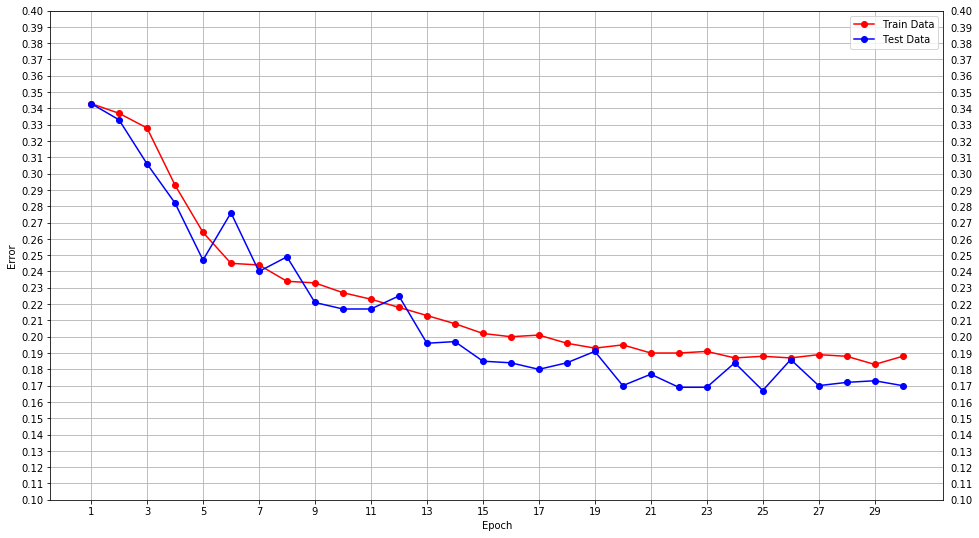

In [9]:
NN = Network3Layer(2, 5, 3, 4.0)  # Input units: 2, Hidden units: 5, Output units: 3, Learning rate: 4.0

epochs = 30  # Training converges after about 30 iterations

train_errors, test_errors = NN.process(TRAIN_DATA, epochs, TEST_DATA)

plt.figure(figsize=FIGURE_SIZE)
plt.grid(True)
plt.plot(range(1, epochs+1), train_errors, 'r-o', label='Train Data')
plt.plot(range(1, epochs+1), test_errors, 'b-o', label='Test Data')
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.xticks(range(1, epochs+1, 2))
plt.yticks(np.arange(0.1, 0.4, 0.01))
plt.legend()
plt.tick_params(labelright=True)
plt.show()

### CONFUSION MATRIX

In [10]:
# 3x3 Matrix: Columns are the true classes, rows are the predicted classes
confusion_matrix = np.zeros((3, 3), dtype=int)

pred_labels = []  # ith element is the predicted label/class for ith test instance.

for (test_data, true_label) in TEST_DATA:
    _, y = NN.feedforward(test_data)
    pred_label = np.argmax(y)  # Predicted label/class
    pred_labels.append(pred_label)
    confusion_matrix[true_label][pred_label] += 1

print(confusion_matrix)

[[21  8  0]
 [ 1 25  1]
 [ 1  5 17]]


### TP, FP, TN, FN

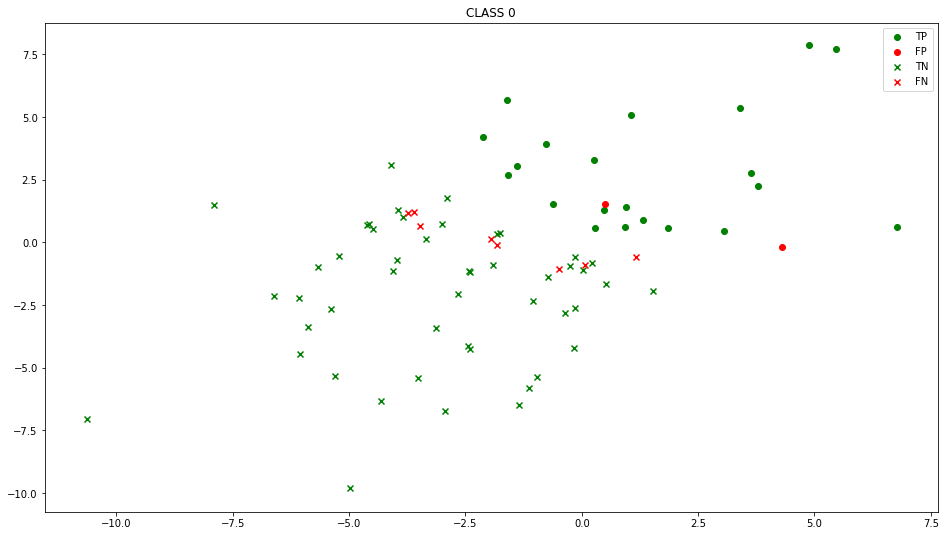

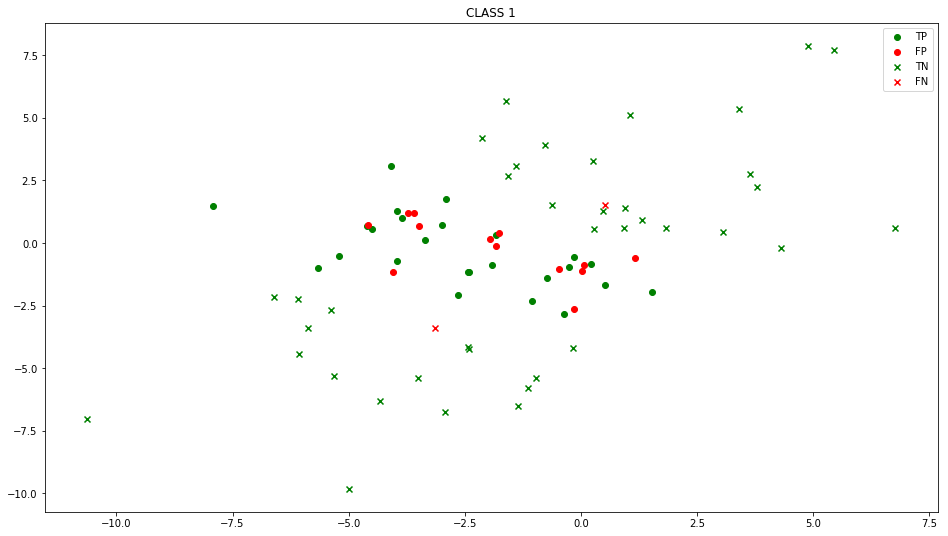

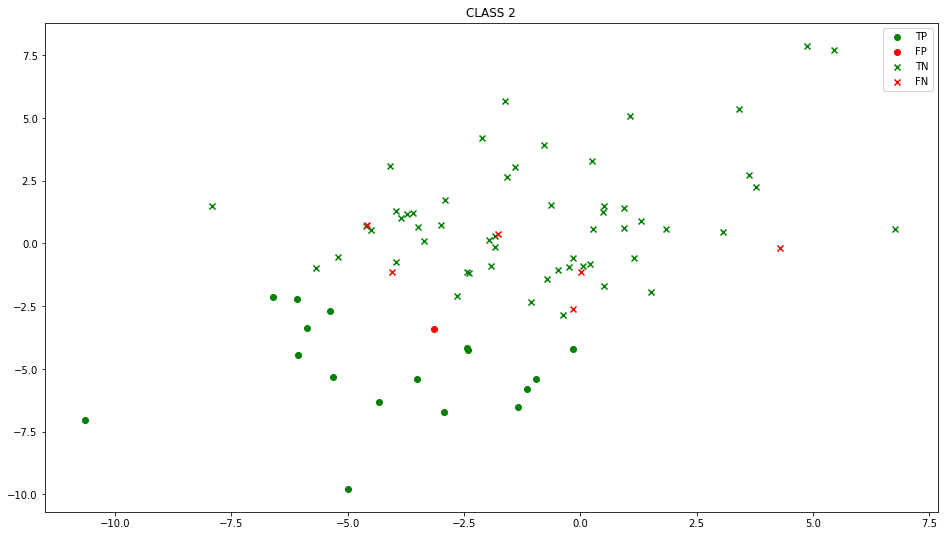

In [11]:
for cls in CLASSES:
    tp = []  # True Positive test instances
    fp = []  # False Positive test instances
    tn = []  # True Negative test instances
    fn = []  # False Negative test instances

    for i in range(len(TEST_DATA)):
        data = TEST_DATA[i][0]
        true_label = TEST_DATA[i][1]
        pred_label = pred_labels[i]

        if pred_label == cls:
            if true_label == cls:
                tp.append(data)  # If data is predicted as class `cls` and its true class is `cls`.
            else:
                fp.append(data)  # If data is predicted as class `cls` and its true class is NOT `cls`.
        else:
            if true_label == cls:
                fn.append(data)  # If data is NOT predicted as class `label` and its true class is `cls`.
            else:
                tn.append(data)  # If data is NOT predicted as class `label` and its true class is NOT `cls`.

    plt.figure(figsize=FIGURE_SIZE)
    for (lst, plt_color, plt_marker, plt_label) in ((tp, 'g', 'o', 'TP'), (fp, 'r', 'o', 'FP'), (tn, 'g', 'x', 'TN'), (fn, 'r', 'x', 'FN')):
        plt.scatter([data[0] for data in lst], [data[1] for data in lst], c=plt_color, marker=plt_marker, label=plt_label)
    plt.legend()
    plt.title(f"CLASS {cls}")

plt.show()